In [514]:
from scipy.io import wavfile
import numpy as np

In [515]:
import matplotlib.pyplot as plt

# Question 1 

### 1.  

In [516]:
samplerate, data = wavfile.read('x.wav')

In [517]:
data

array([466, 660, 465, ...,   8,  10,   7], dtype=int16)

In [518]:
samplerate

16000

In [519]:
len(data)

63488

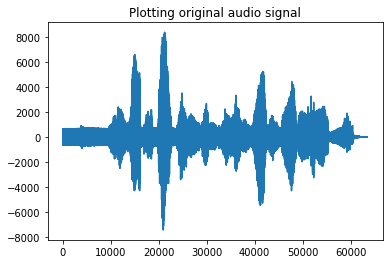

In [616]:
plt.plot(data)
plt.title('Plotting original audio signal')
plt.show()

In [521]:
import IPython
IPython.display.Audio("x.wav")

### 2. Implementing DFT matrix 

Here is the spectrogram of the data. We can clearly see the line which shows the beeping noise frequency

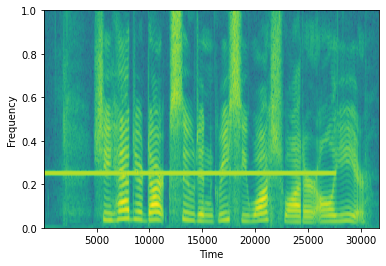

In [595]:
plt.specgram(data)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [596]:
N = 1600

In [597]:
freq = 1600

In [525]:
X_f = np.array([[np.exp(-2j * np.pi * f * (n/N)) for f in range(freq)] for n in range(N)])

In [527]:
X_f_real = X_f.real

In [528]:
X_f_imag = X_f.imag

In [529]:
import seaborn as sns

Here, we are plotting the **real values of DFT**. It is not as clear to depict as in the slides due to high number of dimension. 

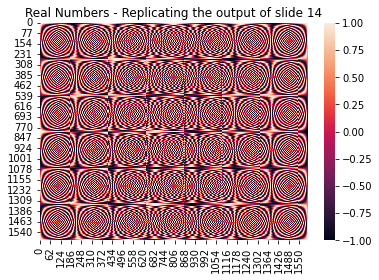

In [530]:
sns.heatmap(X_f_real)
plt.title('Real Numbers - Replicating the output of slide 14')
plt.show()

Here, we are plotting the **imaginary values of DFT**. It is not as clear to depict as in the slides due to high number of dimension. 

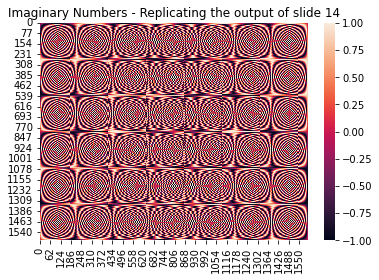

In [531]:
sns.heatmap(X_f_imag)
plt.title('Imaginary Numbers - Replicating the output of slide 14')
plt.show()

### 3. Hann Window 

In [532]:
hann = np.array([np.sin((np.pi * n)/N)**2 for n in range(N)])

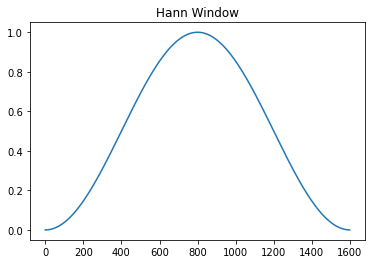

In [598]:
plt.plot(hann)
plt.title('Hann Window')
plt.show()

In [599]:
import pandas as pd
df =pd.DataFrame()

In [601]:
# norm = np.linalg.norm(data)

In [602]:
for i in range(0,len(data)-int(N),int(N/2)):
    values = pd.Series(np.multiply(data[i:i+1600],hann[:len(data[i:i+1600])]))
    df = pd.concat([df,values],axis=1)

In [603]:
X = np.array(df)

In [604]:
X.shape

(1600, 78)

In [605]:
X[np.isnan(X)] = 0

### 4. Creating Spectrogram and removing the noise

In [608]:
spec = np.dot(X_f,X)

In [609]:
spec_normalized = spec / np.linalg.norm(spec,axis=0)

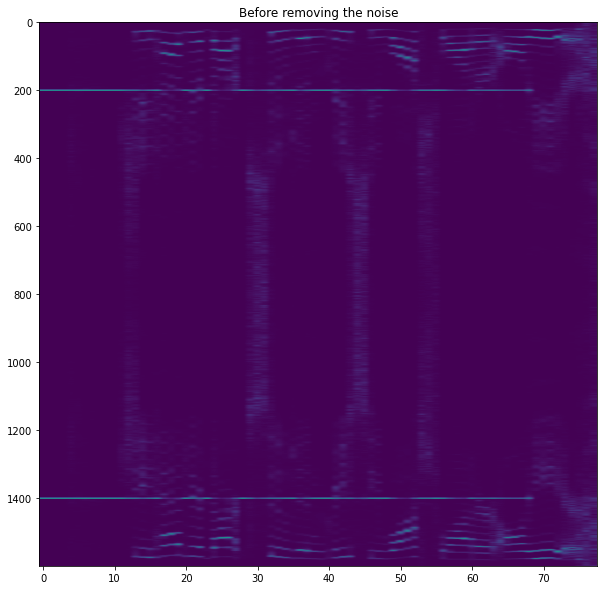

In [610]:
plt.figure(figsize=(10,10))
plt.imshow(abs(spec_normalized),aspect='auto')
plt.title('Before removing the noise')
plt.show()

In [611]:
spec_normalized[199:202,:69] = 0

In [612]:
spec_normalized[1399:1402,:69] = 0

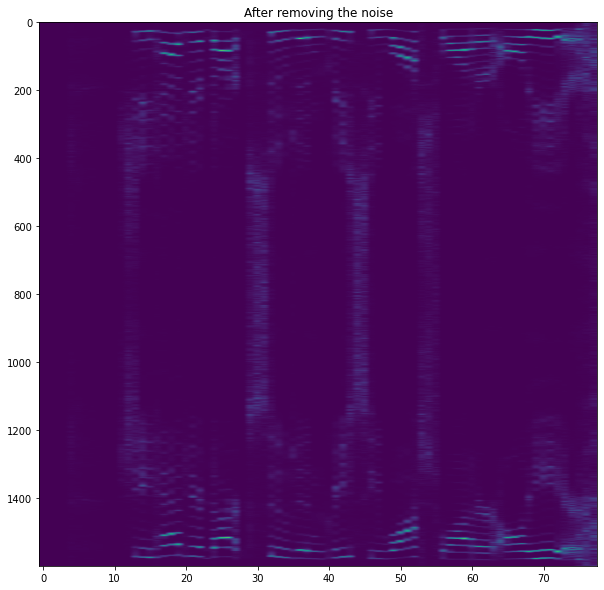

In [613]:
plt.figure(figsize=(10,10))
plt.imshow(abs(spec_normalized),aspect='auto')
plt.title('After removing the noise')
plt.show()

### 5. Inverse DFT and Getting the original data back

In [547]:
inverse_X_f = np.array([[(np.exp(2j * np.pi * f * (n/N)))/N for f in range(freq)] for n in range(N)])

In [548]:
inverse_X_f.shape

(1600, 1600)

In [549]:
Identity = np.dot(inverse_X_f,X_f)

In [550]:
Identity.real

array([[ 1.00000000e+00,  4.16333634e-17, -5.55111512e-17, ...,
         4.91273688e-15,  9.81714710e-14,  8.29614155e-14],
       [ 8.32667268e-17,  1.00000000e+00,  9.71445147e-17, ...,
         3.21964677e-15,  6.69048150e-14,  4.89608354e-14],
       [ 0.00000000e+00,  2.08166817e-16,  1.00000000e+00, ...,
         3.00801051e-15,  4.78228568e-14,  1.61121116e-14],
       ...,
       [-2.50494070e-15, -4.21884749e-15, -3.87190280e-15, ...,
         1.00000000e+00, -2.03365103e-13, -5.06261699e-14],
       [ 1.29479760e-14,  3.96210842e-15,  5.55111512e-17, ...,
        -4.32986980e-15,  1.00000000e+00, -6.16728890e-14],
       [ 4.22439861e-14,  2.21767049e-14,  1.16781584e-14, ...,
        -1.35585987e-14,  1.59122715e-13,  1.00000000e+00]])

In [551]:
spec.shape

(1600, 78)

In [552]:
X_hat = np.dot(inverse_X_f,spec_normalized)

In [553]:
X_hat_real = X_hat.real

In [554]:
X_hat_real.shape

(1600, 78)

In [555]:
cleaned_data = np.zeros(len(data))
window = N//2
for i in range(X_hat_real.shape[1]):
    cleaned_data[i*window:(i*window)+(2 * window)] += X_hat_real[:window*2,i]

In [556]:
new_norm = np.linalg.norm(cleaned_data)

In [557]:
clean = cleaned_data * new_norm

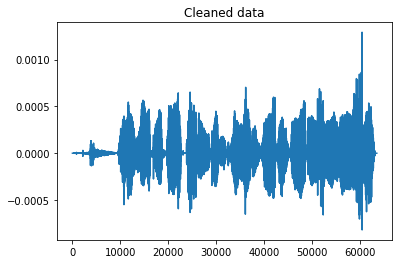

In [617]:
plt.plot(clean)
plt.title('Cleaned data')
plt.show()

In [559]:
import IPython
IPython.display.Audio(clean,rate=16000,normalize=True)

# Question 2 Clustering 

### 1. , 2. , 3. , 4.  

In [560]:
from PIL import Image

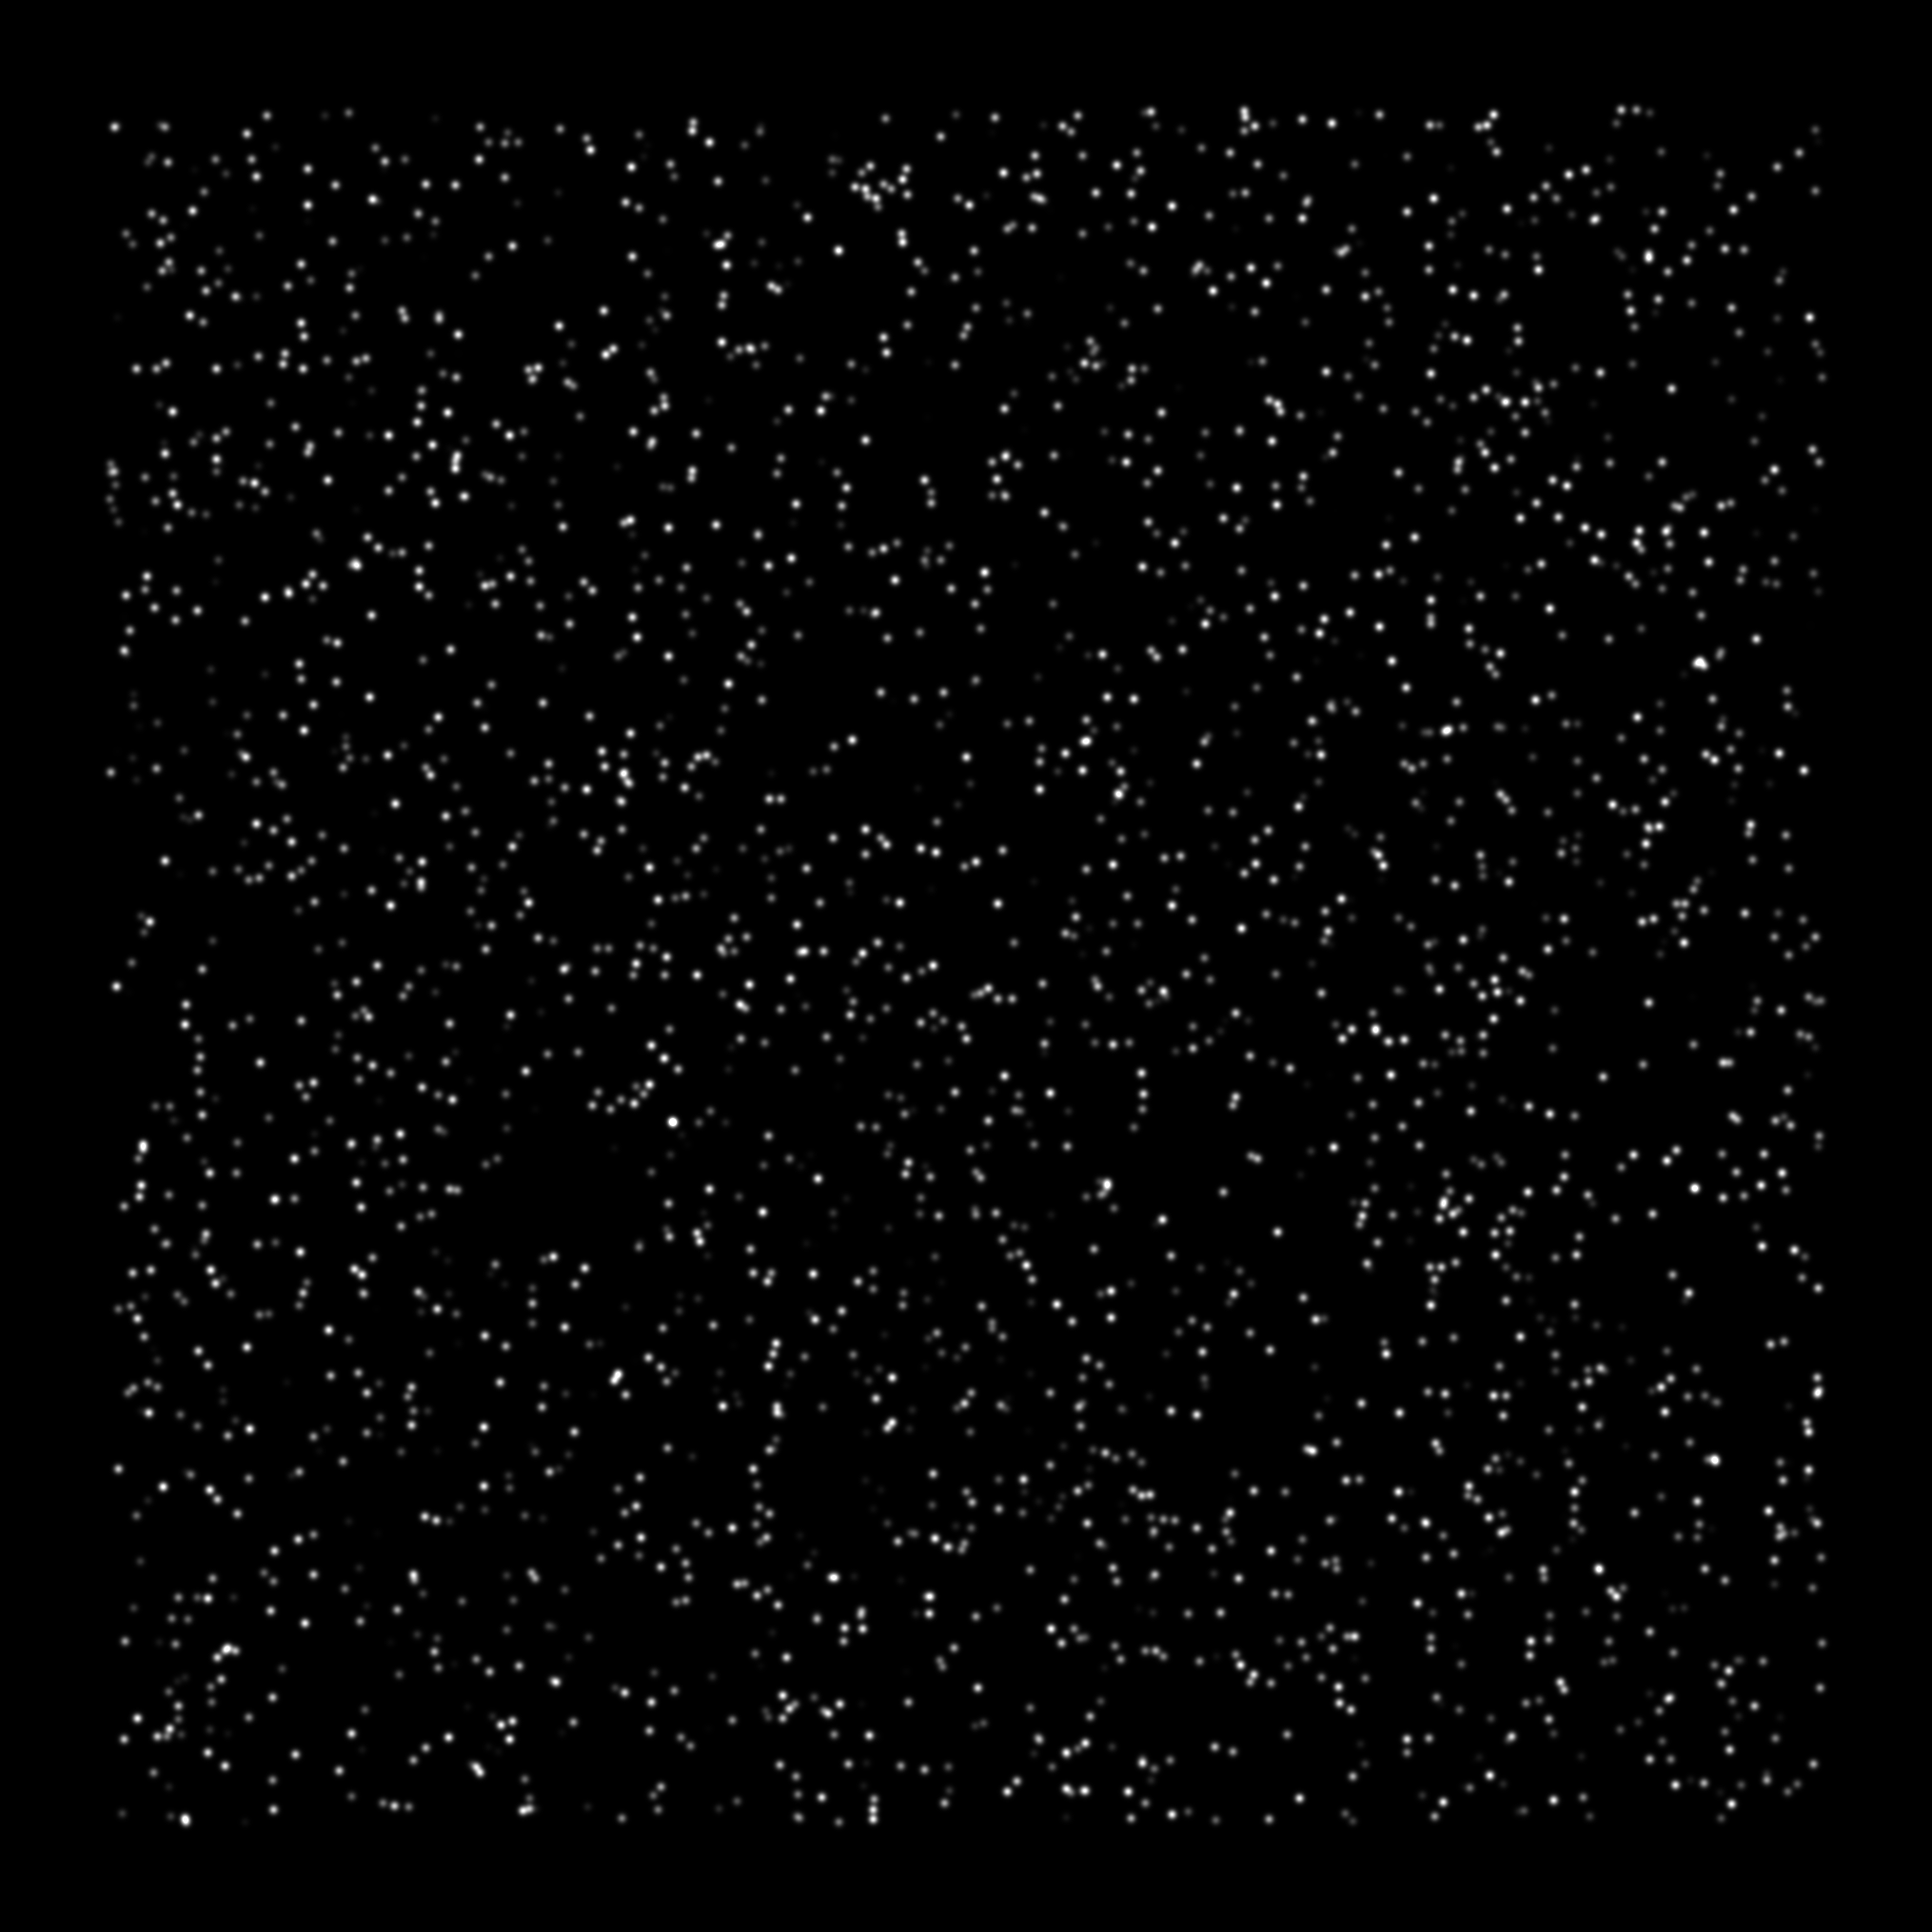

In [561]:
Image.open('june.png')

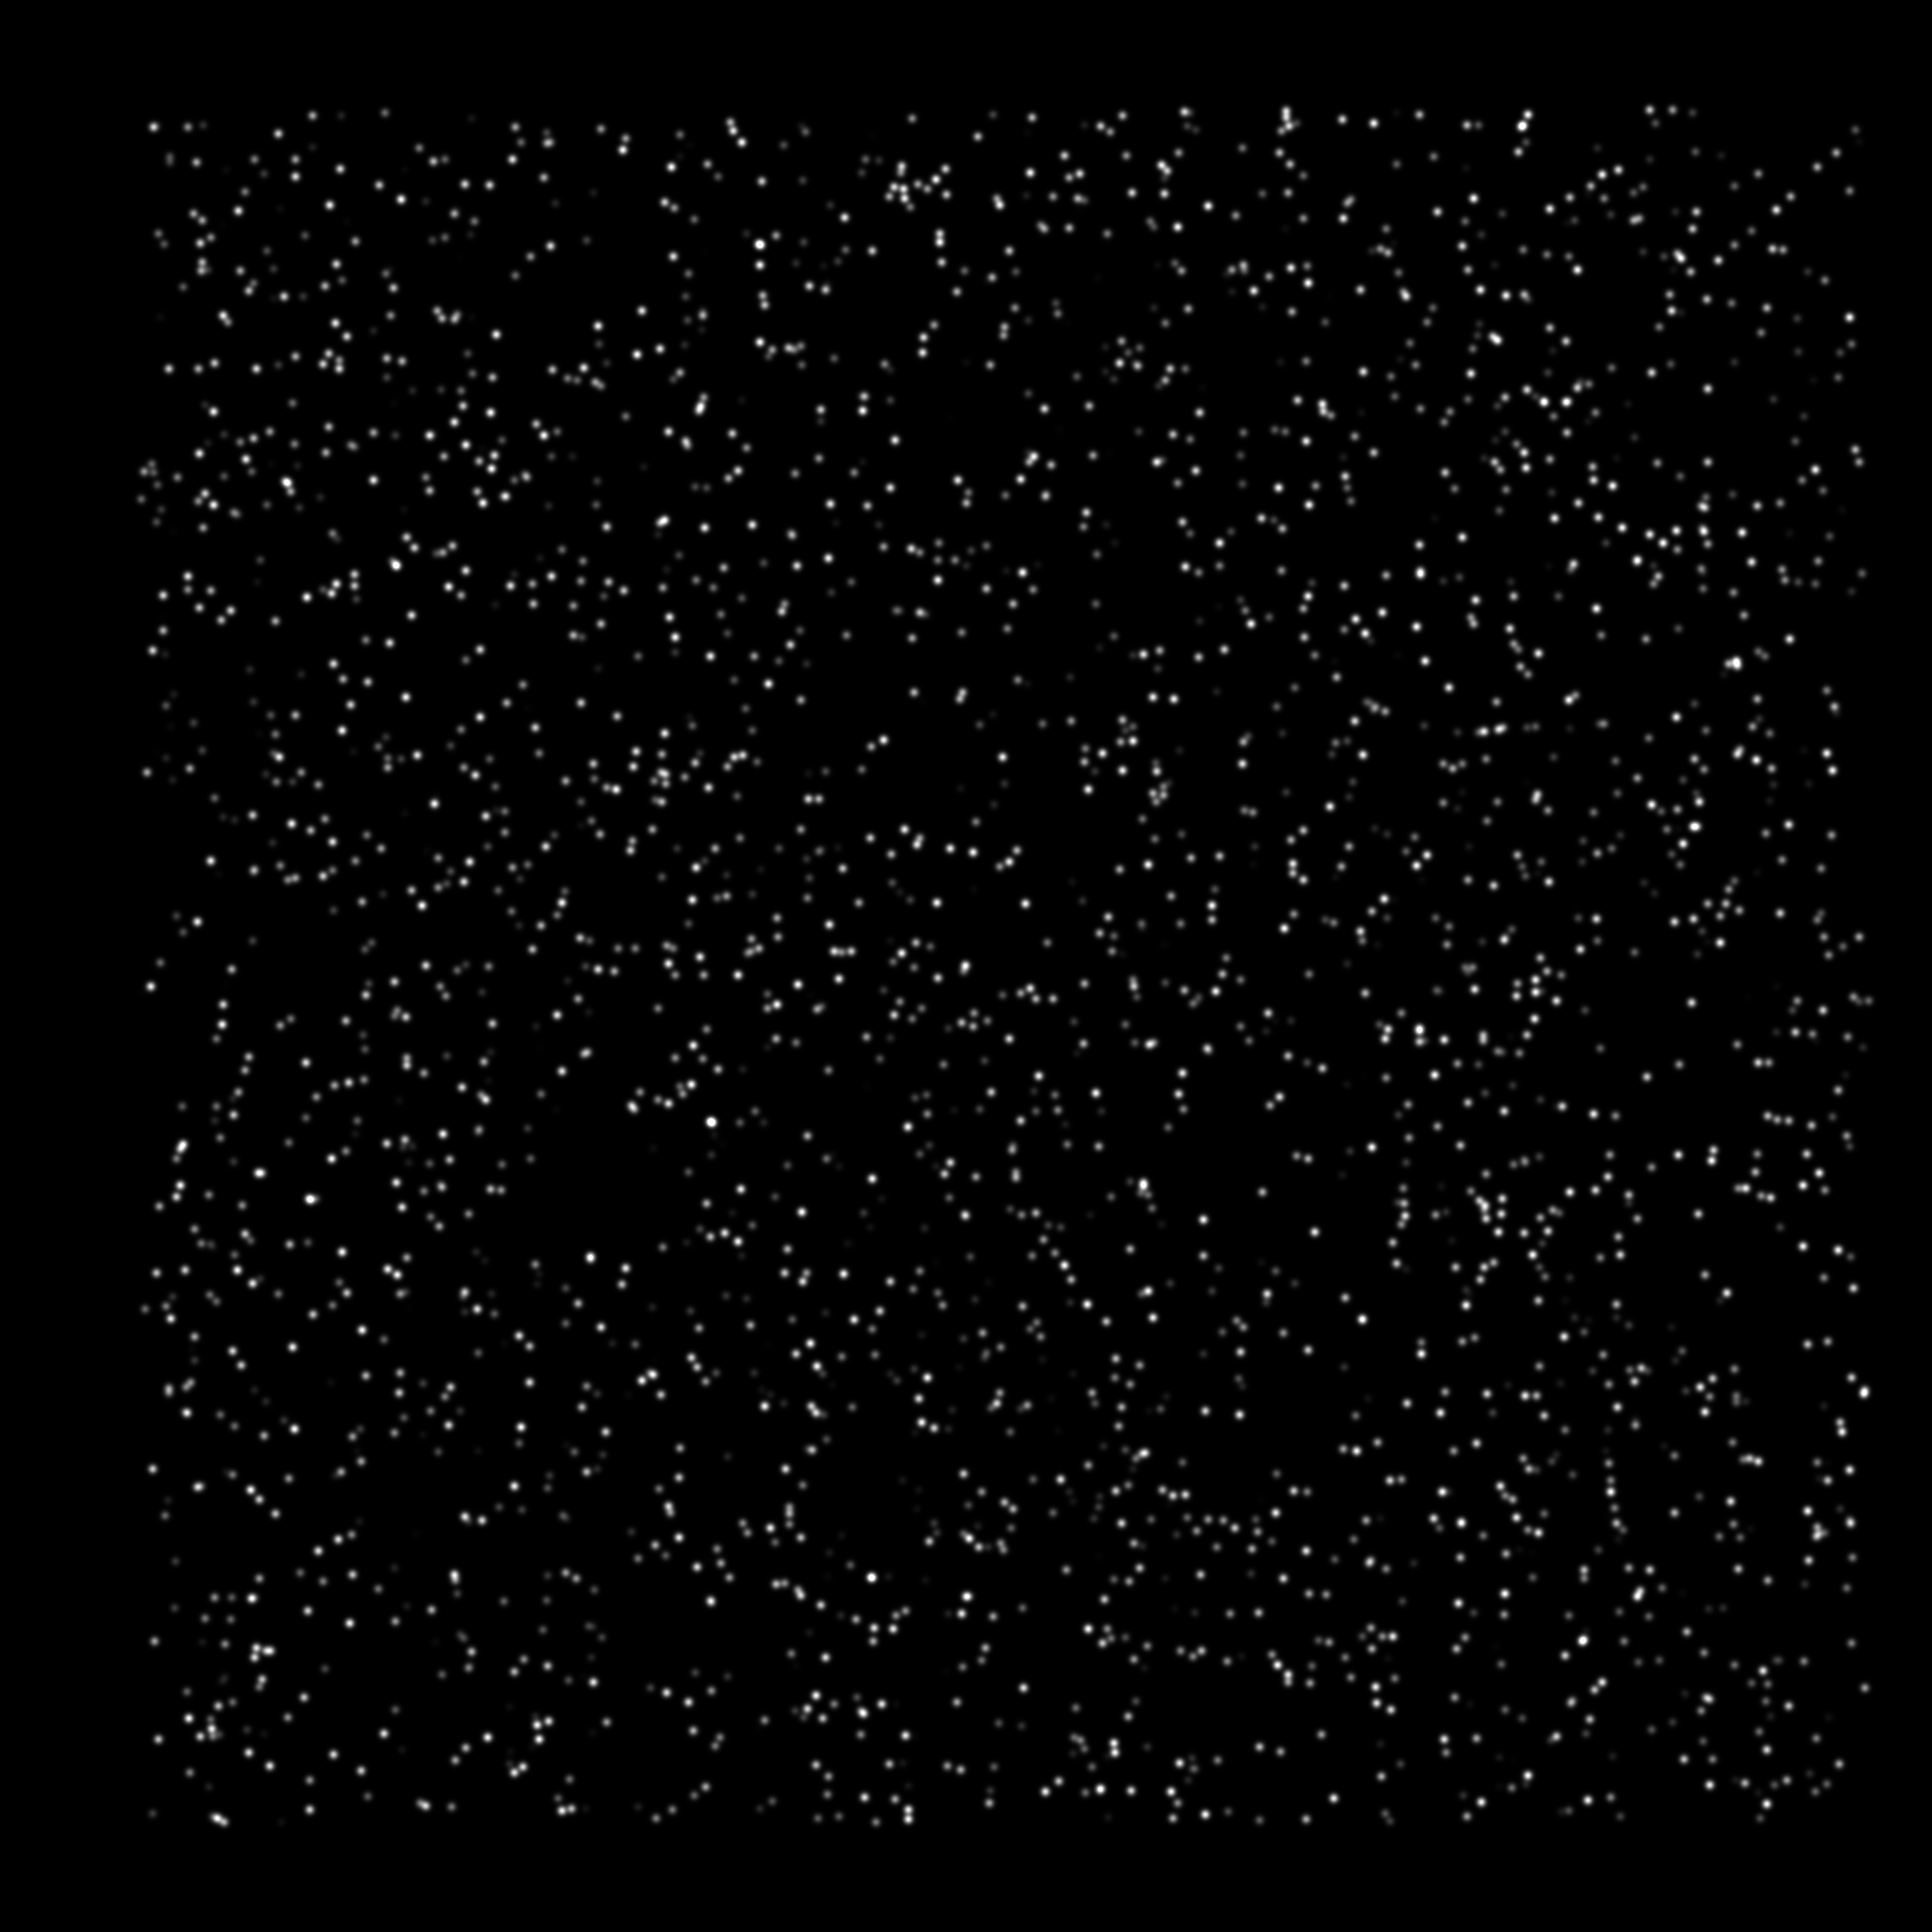

In [562]:
Image.open('december.png')

### 5. Reading the data 

In [563]:
import scipy.io
june_mat = scipy.io.loadmat('june.mat')['june']

In [564]:
import scipy.io
december_mat = scipy.io.loadmat('december.mat')['december']

### 6. Disparity vector 

In [565]:
difference = december_mat[:,0]-june_mat[:,0]

In [567]:
difference = difference.astype(np.float64)

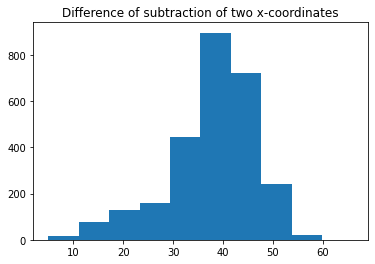

In [619]:
plt.hist(difference)
plt.title('Difference of subtraction of two x-coordinates')
plt.show()

Here, we can see that it is not exactly clear which two clusters we have from the graph. We can see the difference in x-coordinates of pictures taken in June vs December

In [620]:
difference_y = december_mat[:,1]-june_mat[:,1]

In [621]:
difference_y = difference_y.astype(np.float64)

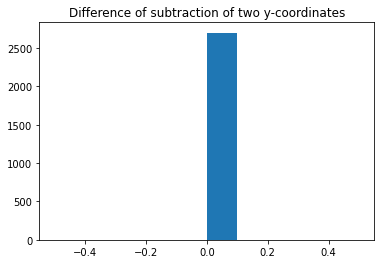

In [622]:
plt.hist(difference_y)
plt.title('Difference of subtraction of two y-coordinates')
plt.show()

Here, it is clear that we don't have any change in y-coordinates. So let us apply clustering on difference on x-coordinates

### 7. Clustering 

In [570]:
k = 2

In [571]:
initialize_cluster_centroid = [np.random.choice(difference),np.random.choice(difference)]

Initializing the centroids

In [572]:
initialize_cluster_centroid

[39.0, 49.0]

In [573]:
def calculating_distance(initialize_cluster_centroid,difference):
    distance_matrix = np.zeros((len(difference),2))
    for k in range(len(initialize_cluster_centroid)):
        for i in range(len(difference)):
            distance_matrix[i][k] = np.sqrt(np.power(initialize_cluster_centroid[k]-difference[i],2))
    return distance_matrix

In [574]:
def calculating_centroid(difference,distance,initialize_cluster_centroid):
    derived_cluster = [0 if distance[i][0]<distance[i][1] else 1 for i in range(len(distance))]
    first_cluster = [difference[i] for i in range(len(difference)) if derived_cluster[i]==0]
    second_cluster = [difference[i] for i in range(len(difference)) if derived_cluster[i]==1]
    initialize_cluster_centroid = [np.mean(first_cluster),np.mean(second_cluster)]
    return initialize_cluster_centroid,derived_cluster

In [575]:
while True:
    distance = calculating_distance(initialize_cluster_centroid,difference)
    new_centroid,derived_cluster = calculating_centroid(difference,distance,initialize_cluster_centroid)
    difference_centroid = np.subtract(initialize_cluster_centroid,new_centroid)
    if new_centroid[0] == initialize_cluster_centroid[0] and new_centroid[1] == initialize_cluster_centroid[1]:
        break
    else:
        initialize_cluster_centroid = new_centroid

In [576]:
initialize_cluster_centroid

[27.74271844660194, 42.31183368869936]

In [577]:
print('The cluster means are: {0} and {1}'.format(initialize_cluster_centroid[0],initialize_cluster_centroid[1]))

The cluster means are: 27.74271844660194 and 42.31183368869936


Here, the cluster with larger mean shows the stars from our galaxy while the smaller mean shows the cluster of starts from the other galaxy because they are not moving as much as the larger mean. 

Also, we applied the clustering on difference of the position of the stars from June and December, which means that the cluster with the largest clustering mean shifted the most.

In [578]:
df = pd.DataFrame({"Diff":difference,"derived":derived_cluster})

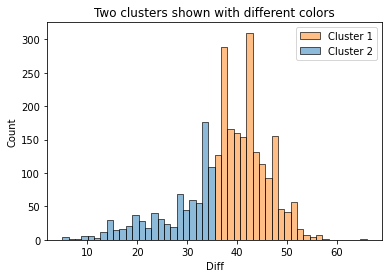

In [579]:
sns.histplot(data=df,x=df['Diff'],hue=df['derived'])
plt.title('Two clusters shown with different colors')
plt.legend(['Cluster 1','Cluster 2'])
plt.show()

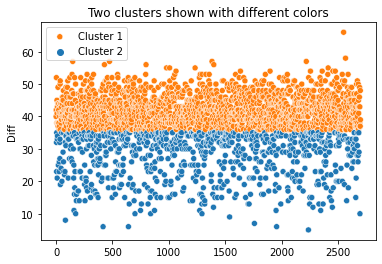

In [580]:
sns.scatterplot(data=df,y=df['Diff'],x=df.index,hue=df['derived'])
plt.title('Two clusters shown with different colors')
plt.legend(['Cluster 1','Cluster 2'])
plt.show()

# Question 3 GMM 

Initializing weights, means and variances

In [631]:
k = 2

In [632]:
weights = np.ones((k))/k

In [633]:
weights

array([0.5, 0.5])

In [634]:
means = np.random.choice(difference,size=k)
means

array([38., 42.])

In [635]:
variances = np.random.random_sample(size=k)

In [636]:
variances

array([0.33188309, 0.830559  ])

In [637]:
bins = np.linspace(np.min(difference),np.max(difference),100)

In [638]:
error = 1e-8

PDF of Gaussian Distribution $$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right) $$

In [639]:
def pdf(data,mean,variance):
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data - mean)/(2*variance)))
    return s1 * s2

**Expectation part:**

$$ b_k  = \frac{f( X | \mu_k , \sigma_k^2 ) \phi_k}{ \sum_{k=1}{K} f( X | \mu_k , \sigma_k^2 ) \phi_k } $$

**Maximization part:**

Mean = $$ \mu_k = \frac{\sum b_k X}{\sum b_k} $$

Variance = $$ \sigma_k^2 = \frac{\sum b_k (X - \mu_k)^2}{\sum b_k} $$

Weight = $$ \phi_k = \frac{\sum b_k}{N} $$

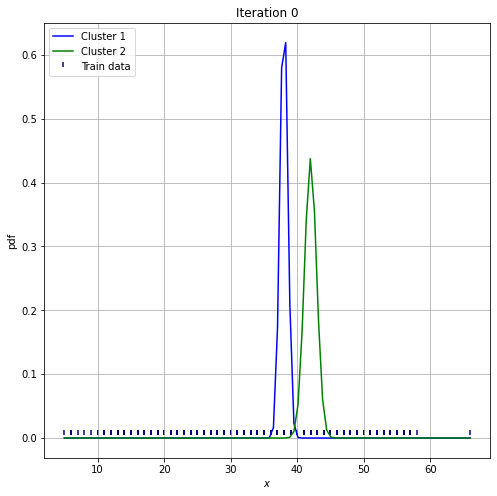

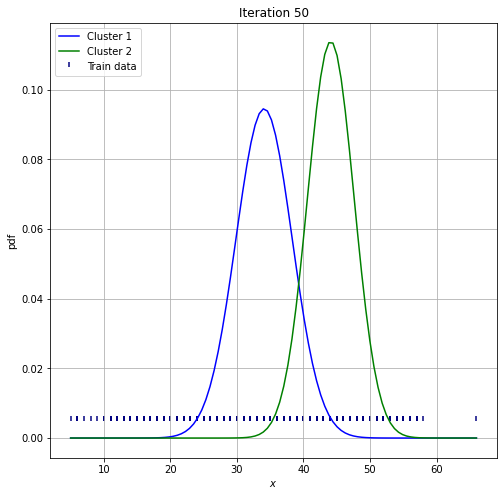

In [640]:
for epoch in range(51):
    if epoch % 50 == 0:
        plt.figure(figsize=(8,8))
        plt.grid()
        axes = plt.gca()
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(epoch))
        plt.scatter(difference, [0.005] * len(difference), color='navy', s=30, marker=2, label="Train data")
        plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
        plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")

        plt.legend(loc='upper left')
        plt.show()
    likelihood = []
    for j in range(k):
        likelihood.append(pdf(difference,means[j],np.sqrt(variances[j])))
    likelihood = np.array(likelihood)
    
    b = []
    for j in range(k):
        b.append((likelihood[j]*weights[j])/(np.sum([likelihood[i] * weights[i] for i in range(k)],axis=0) + error))
        
        means[j] = np.sum(b[j] * difference) / (np.sum(b[j])+error)
        variances[j] = np.sum(b[j] * np.square(difference - means[j])) / np.sum(b[j]+error)
        weights[j] = np.mean(b[j])

Here, we can depict two gaussian distributions defining two separate clusters

**The estimated means of the clusters are:**

In [641]:
print("Mean of Cluster 1 : {0} and Mean of Clusters 2 : {1}".format(means[0],means[1]))

Mean of Cluster 1 : 34.08086472433533 and Mean of Clusters 2 : 44.1061928488695


**The estimated variances of the clusters are:**

In [642]:
print("Variance of Cluster 1 : {0} and Variance of Clusters 2 : {1}".format(variances[0],variances[1]))

Variance of Cluster 1 : 17.80582933290003 and Variance of Clusters 2 : 12.271130795442474


**The estimated weights of the clusters are:**

In [645]:
print("Weight of Cluster 1 : {0} and Weight of Clusters 2 : {1}".format(weights[0],weights[1]))

Weight of Cluster 1 : 0.4313874202869171 and Weight of Clusters 2 : 0.4905339131597562


refered: [link](https://towardsdatascience.com/how-to-code-gaussian-mixture-models-from-scratch-in-python-9e7975df5252)

### Conclusion 

Here, the mean result of these clusters is quite similar in K-means and GMM. However, k-means creates a boundary between the data as we can see in the graphs of clustering while GMM measures the probability of each point being in the calculated cluster. When two galaxies are combining, we have stars at the end of the galaxy that start to combine together so it would not be wise to separate them with a boundary using Clustering. Instead, we can use GMM and using the PDF, we can calculate the probability of that star being in the particular galaxy.